In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [17]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701620,86.586035,2.418986,2.685651,2.008053,1.010313,0.657861
std,6.357078,0.093368,26.191163,0.533996,0.778079,0.612950,0.850613,0.608926
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.470000,2.000000,2.660000,1.585000,0.125000,0.000000
50%,23.000000,1.700000,83.000000,2.390000,3.000000,2.000000,1.000000,0.625000
75%,26.000000,1.770000,107.430000,3.000000,3.000000,2.480000,1.670000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [19]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Gender: ['Female' 'Male']


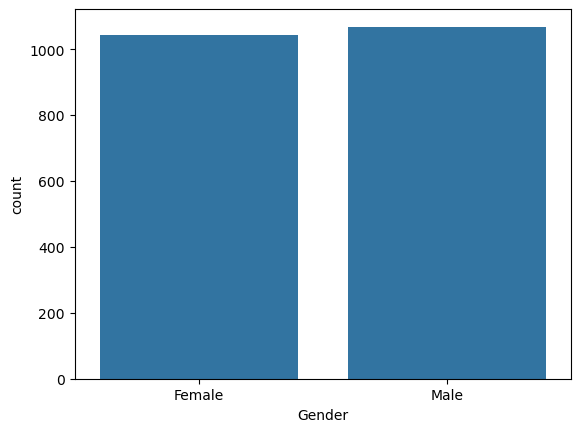

family_history_with_overweight: ['yes' 'no']


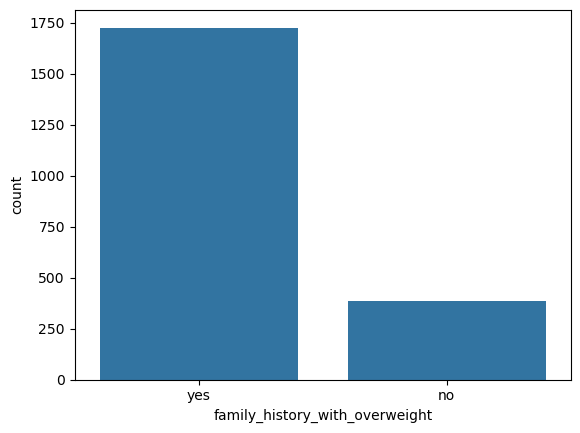

FAVC: ['no' 'yes']


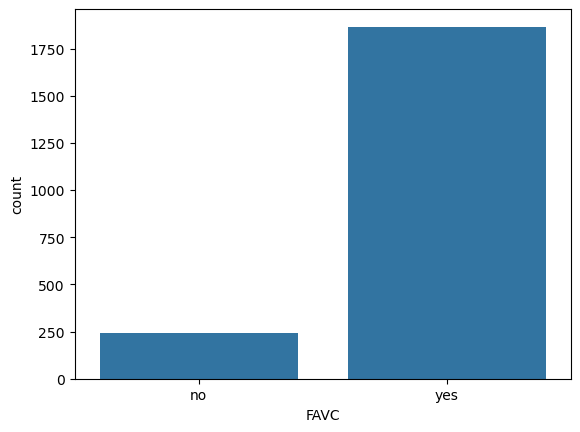

CAEC: ['Sometimes' 'Frequently' 'Always' 'no']


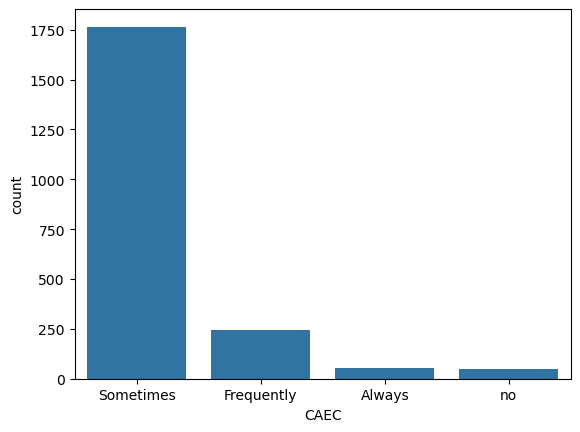

SMOKE: ['no' 'yes']


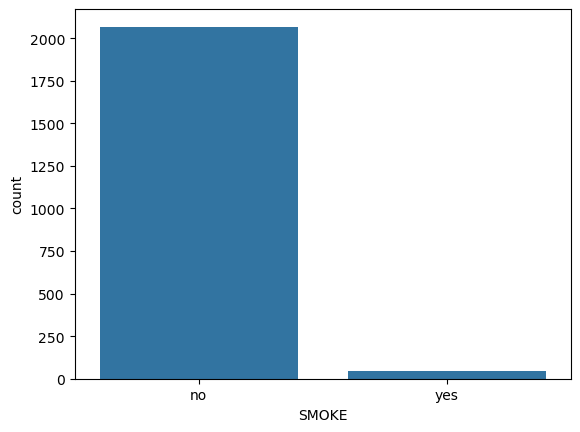

SCC: ['no' 'yes']


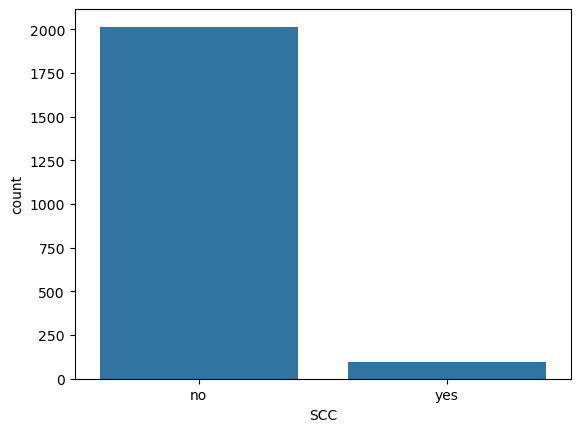

CALC: ['no' 'Sometimes' 'Frequently' 'Always']


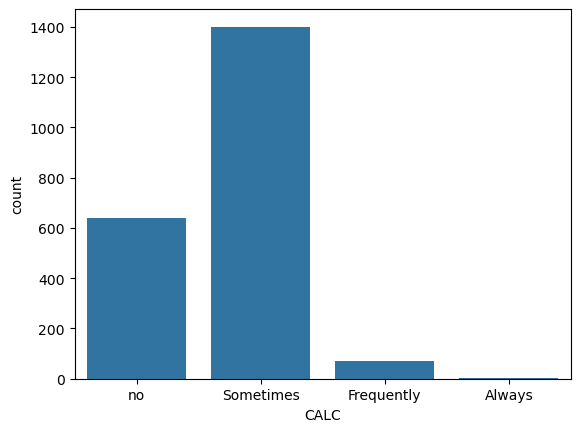

MTRANS: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']


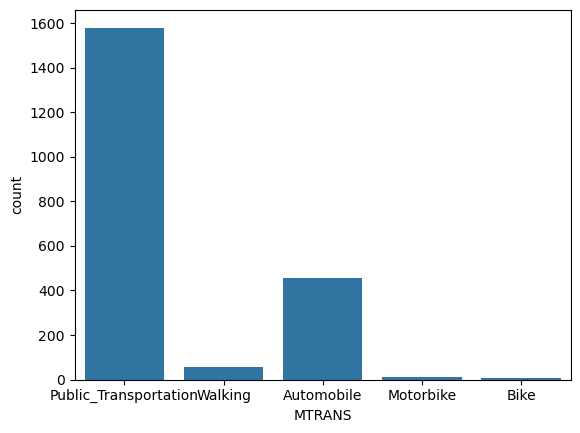

NObeyesdad: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


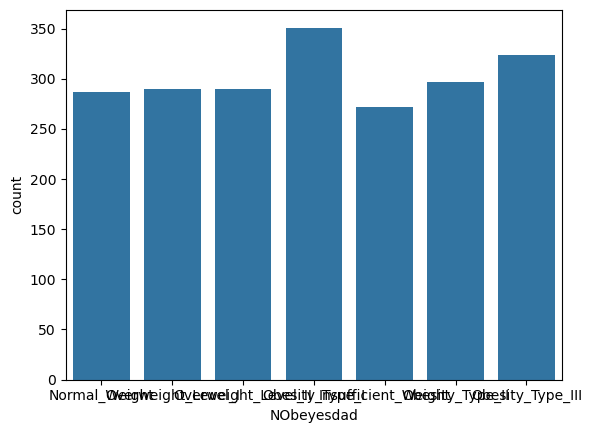

In [20]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"{col}: {df[col].unique()}")
    sns.countplot(x = col, data = df)
    plt.show()

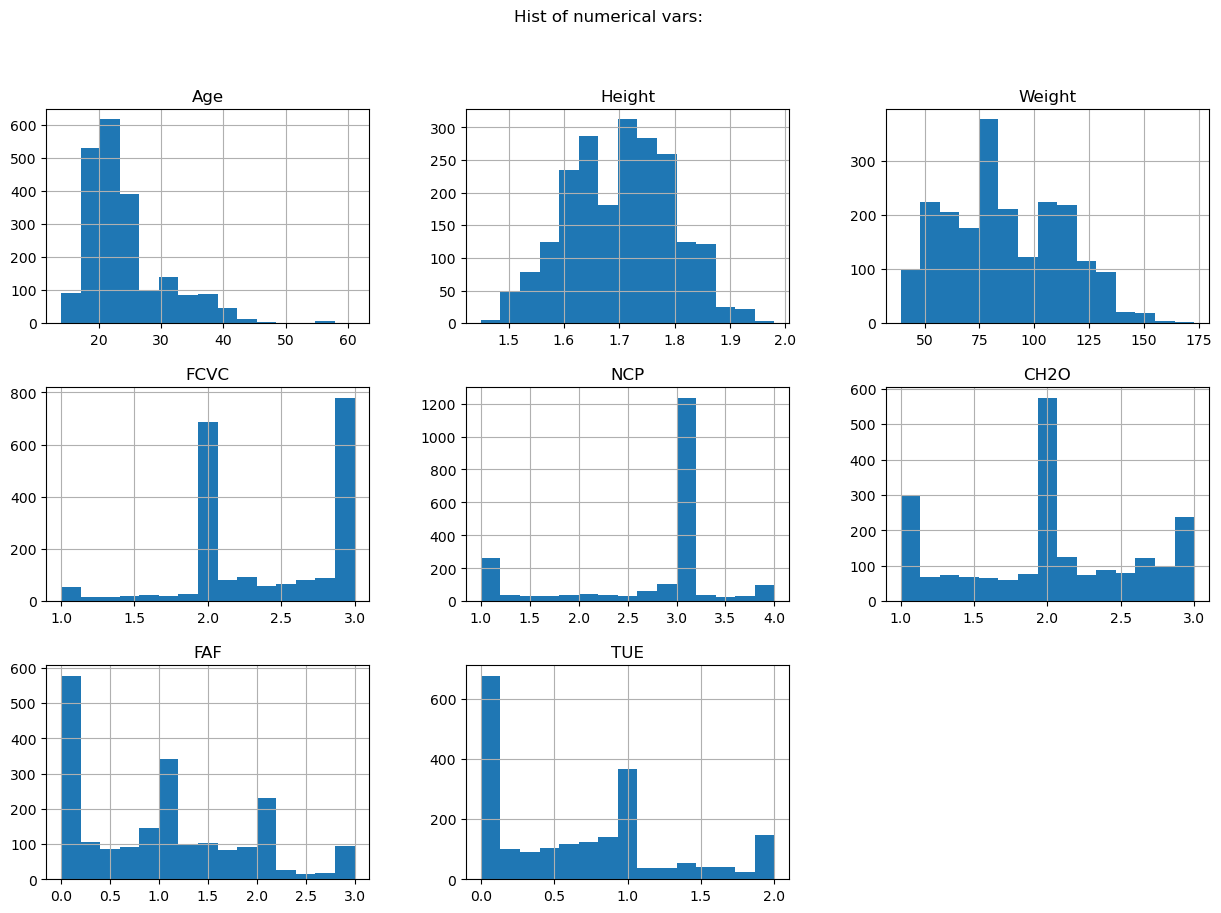

In [21]:
num_col = df.select_dtypes(include=['int64','float64']).columns
df[num_col].hist(bins = 15,figsize=(15,10))
plt.suptitle('Hist of numerical vars:')
plt.show()

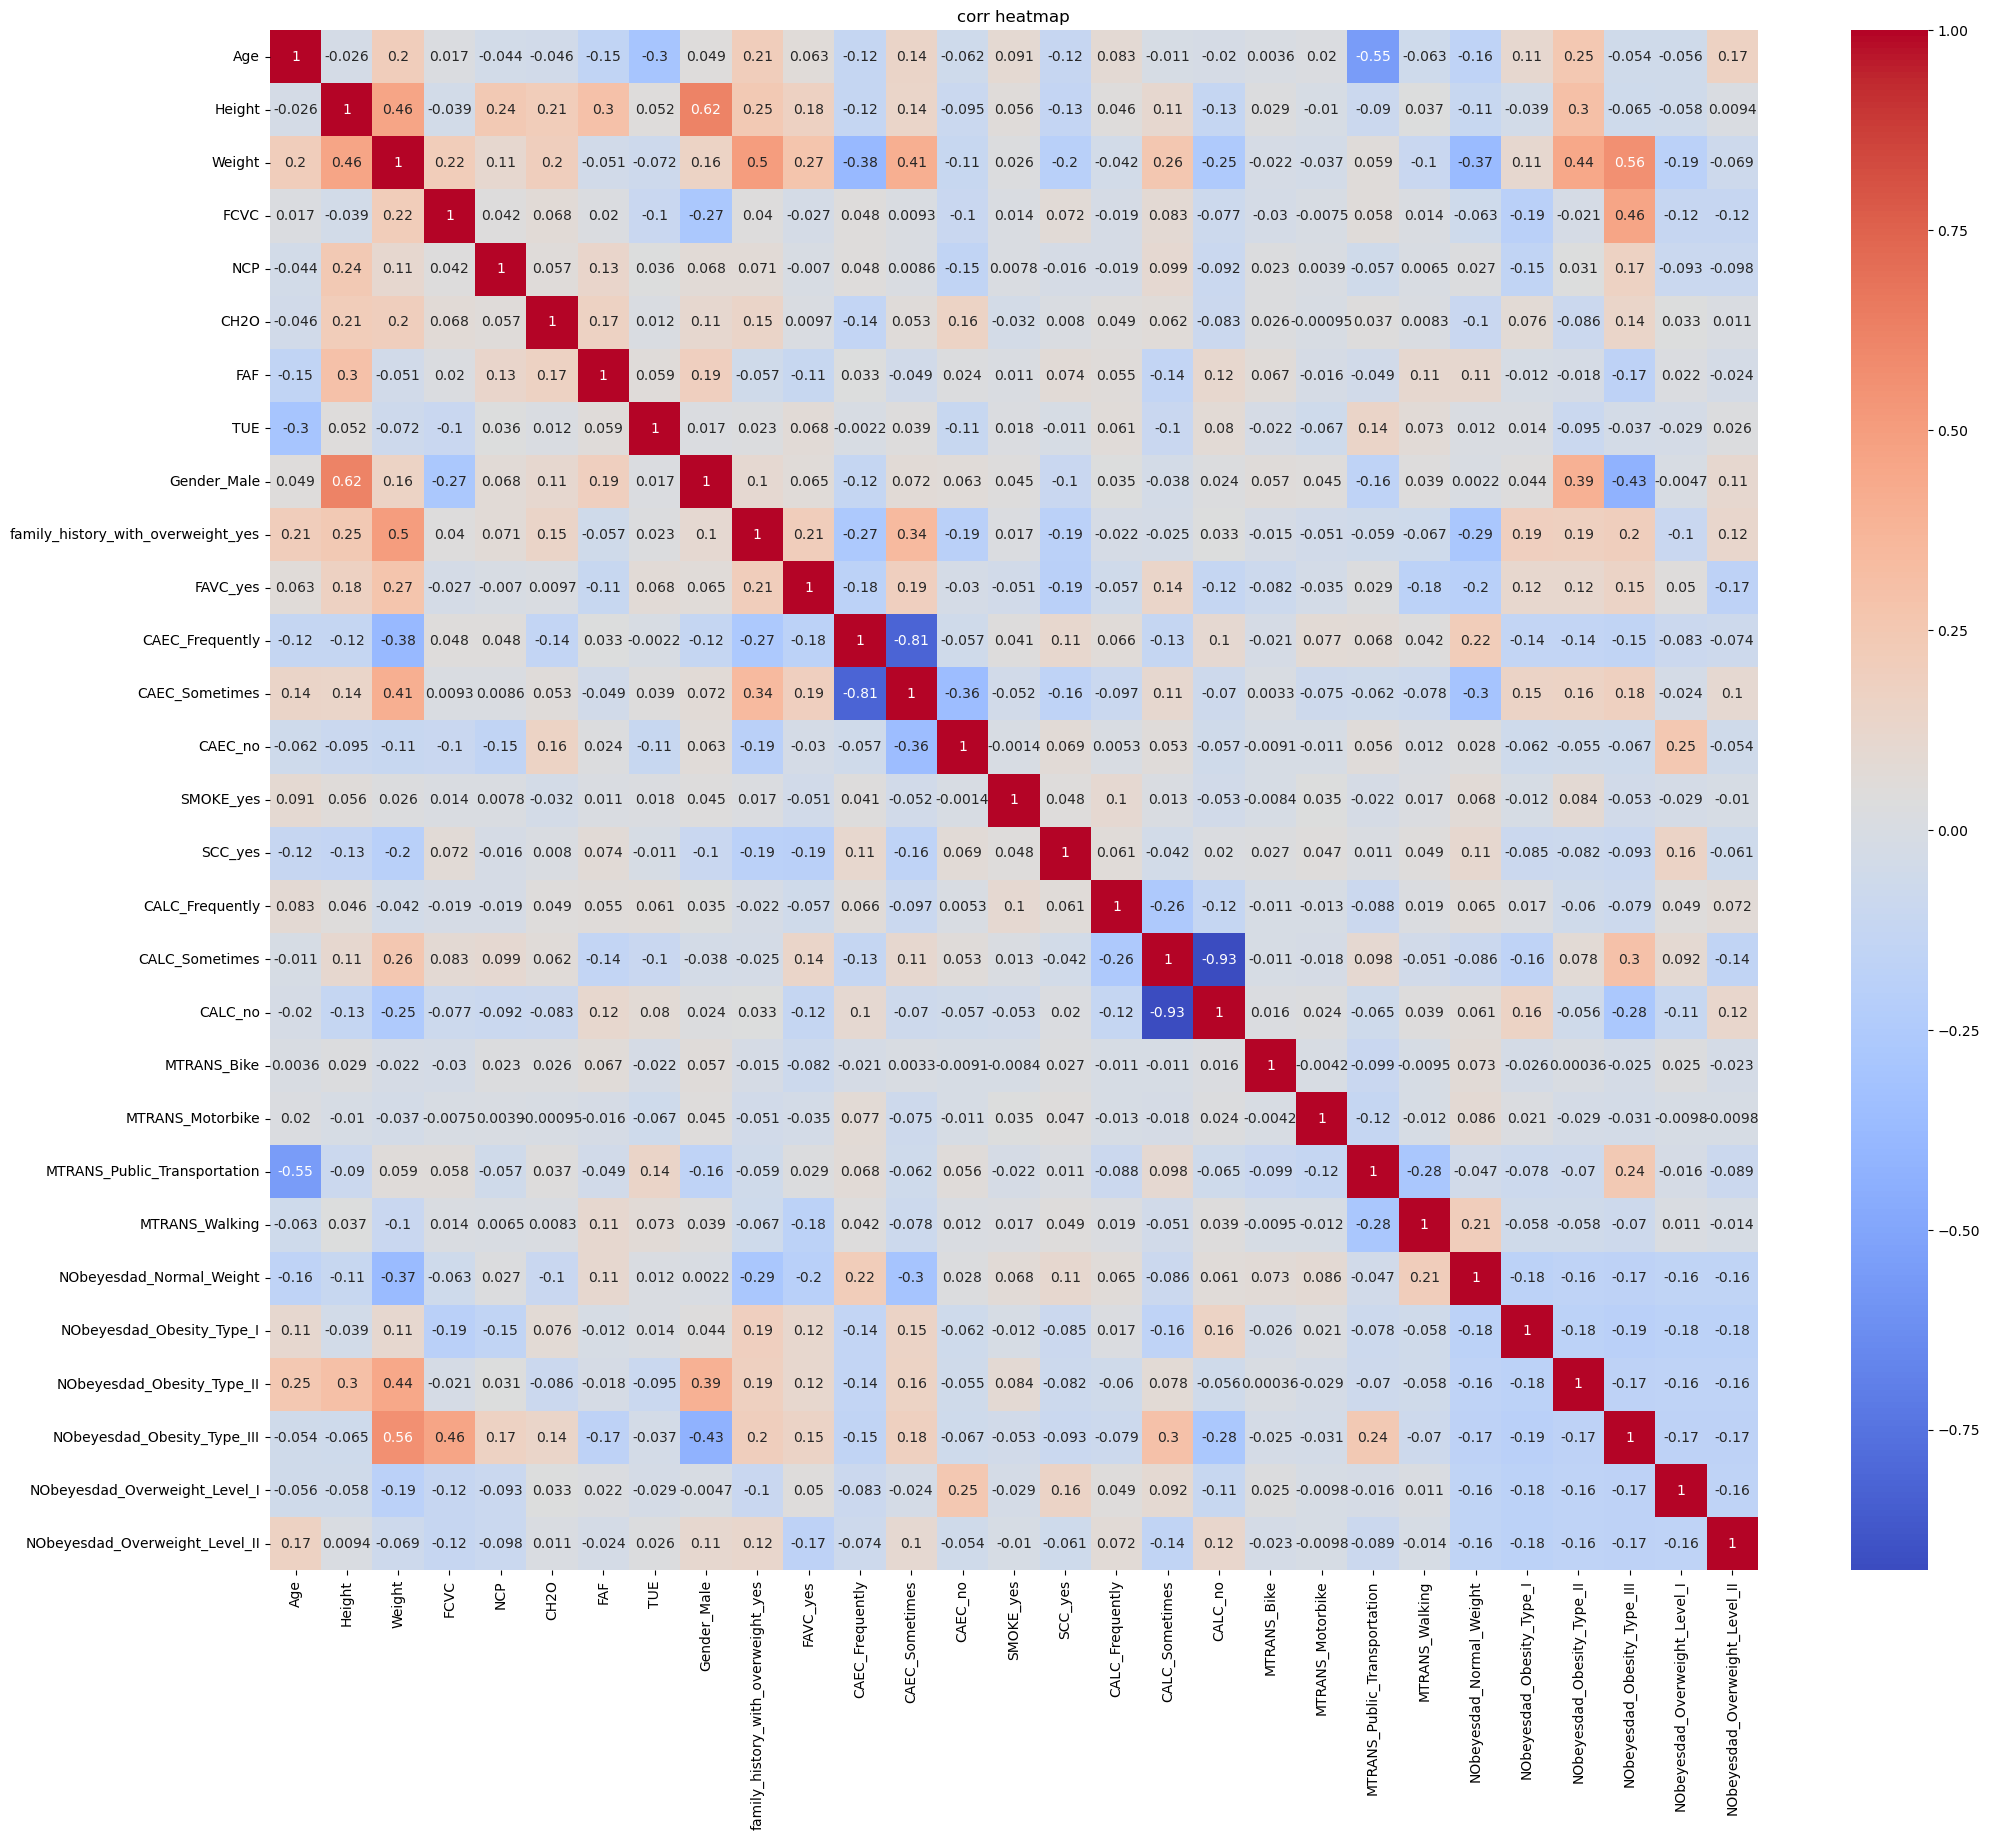

In [22]:
df = pd.get_dummies(df,drop_first=True)
corr_mat = df.corr()
plt.figure(figsize=(24,20))
sns.heatmap(corr_mat,annot = True,cmap = 'coolwarm')
plt.title('corr heatmap')
plt.show()

In [23]:
red_val = {}

for col in df.columns:
    freq_val_cnt = df[col].mode().iloc[0]
    cnt = (df[col] == freq_val_cnt).sum()
    red_val[col] = cnt
print(red_val)

{'Age': 236, 'Height': 125, 'Weight': 59, 'FCVC': 658, 'NCP': 1208, 'CH2O': 467, 'FAF': 421, 'TUE': 560, 'Gender_Male': 1068, 'family_history_with_overweight_yes': 1726, 'FAVC_yes': 1866, 'CAEC_Frequently': 1869, 'CAEC_Sometimes': 1765, 'CAEC_no': 2060, 'SMOKE_yes': 2067, 'SCC_yes': 2015, 'CALC_Frequently': 2041, 'CALC_Sometimes': 1401, 'CALC_no': 1472, 'MTRANS_Bike': 2104, 'MTRANS_Motorbike': 2100, 'MTRANS_Public_Transportation': 1580, 'MTRANS_Walking': 2055, 'NObeyesdad_Normal_Weight': 1824, 'NObeyesdad_Obesity_Type_I': 1760, 'NObeyesdad_Obesity_Type_II': 1814, 'NObeyesdad_Obesity_Type_III': 1787, 'NObeyesdad_Overweight_Level_I': 1821, 'NObeyesdad_Overweight_Level_II': 1821}


In [28]:
print(df.columns)


Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_Male', 'family_history_with_overweight_yes', 'FAVC_yes',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes', 'SCC_yes',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking',
       'NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I',
       'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III',
       'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II'],
      dtype='object')


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()   

x = df.drop(['NObeyesdad_Normal_Weight','NObeyesdad_Obesity_Type_I','NObeyesdad_Obesity_Type_II','NObeyesdad_Obesity_Type_III','NObeyesdad_Overweight_Level_I','NObeyesdad_Overweight_Level_II'],axis = 1)
y = df[['NObeyesdad_Normal_Weight','NObeyesdad_Obesity_Type_I','NObeyesdad_Obesity_Type_II','NObeyesdad_Obesity_Type_III','NObeyesdad_Overweight_Level_I','NObeyesdad_Overweight_Level_II']]
y = np.argmax(y,axis = 1)
y = le.fit_transform(y)

num_col = df.select_dtypes(include=['int64','float64']).columns

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

sc = StandardScaler()
x_train[num_col] = sc.fit_transform(x_train[num_col])
x_test[num_col] = sc.transform(x_test[num_col])

In [38]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2111 non-null   int64  
 1   Height                              2111 non-null   float64
 2   Weight                              2111 non-null   float64
 3   FCVC                                2111 non-null   float64
 4   NCP                                 2111 non-null   float64
 5   CH2O                                2111 non-null   float64
 6   FAF                                 2111 non-null   float64
 7   TUE                                 2111 non-null   float64
 8   Gender_Male                         2111 non-null   bool   
 9   family_history_with_overweight_yes  2111 non-null   bool   
 10  FAVC_yes                            2111 non-null   bool   
 11  CAEC_Frequently                     2111 no

In [46]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

In [48]:
from sklearn.metrics import accuracy_score, classification_report

print("acc: ", accuracy_score(y_test,y_pred))
print("class report: ",classification_report(y_test,y_pred))

acc:  0.9125295508274232
class report:                precision    recall  f1-score   support

           0       0.97      0.94      0.95       118
           1       0.93      0.90      0.92        78
           2       0.90      0.97      0.93        58
           3       1.00      1.00      1.00        63
           4       0.81      0.77      0.79        56
           5       0.78      0.86      0.82        50

    accuracy                           0.91       423
   macro avg       0.90      0.91      0.90       423
weighted avg       0.91      0.91      0.91       423



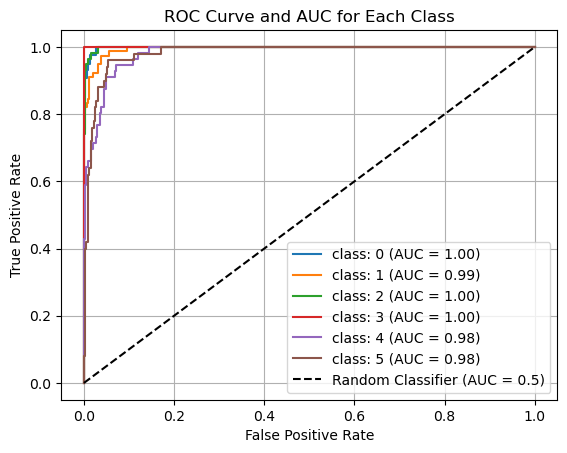

In [52]:
from sklearn.metrics import roc_curve, auc
y_pred_prob = model.predict_proba(x_test)
for i in range(y_pred_prob.shape[1]):
    fpr,tpr,_ = roc_curve(y_test == i,y_pred_prob[:,i])
    roc_au = auc(fpr,tpr)
    plt.plot(fpr,tpr,label = f'class: {i} (AUC = {roc_au:.2f})')
    
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve and AUC for Each Class')
plt.legend(loc='lower right')
plt.grid()
plt.show()